In [6]:
import pandas as pd
import sqlite3
import regex as re
import spacy

In [7]:
spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
pip install spacy

In [9]:
#1-a
c = sqlite3.connect("wiki-articles-hw2.db")

r= c.cursor()
r.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(r.fetchall())

df = pd.read_sql_query("SELECT * from wiki_articles_hw2", c)

c.close()

n = spacy.load("en_core_web_lg")
df

[('wiki_articles_hw2',)]


,title,text,name,url,datePublished,headline
0,Abuse case,"From Wikipedia, the free encyclopedia\n\n\nAbu...",Abuse case,https://en.wikipedia.org/wiki/Abuse_case,2010-03-19T13:30:06Z,specification model for security requirements ...
1,Application security,"From Wikipedia, the free encyclopedia\n\n\nMea...",Application security,https://en.wikipedia.org/wiki/Application_secu...,2005-08-29T21:54:46Z,measures taken to improve the security of an a...
2,Asset (computer security),"From Wikipedia, the free encyclopedia\n\n\nDat...",Asset (computer security),https://en.wikipedia.org/wiki/Asset_(computer_...,2010-11-21T12:40:30Z,"any data, device, or other component of the en..."
3,Attack tree,"From Wikipedia, the free encyclopedia\n\n\nCon...",Attack tree,https://en.wikipedia.org/wiki/Attack_tree,2006-03-10T05:06:02Z,"conceptual diagrams showing how an asset, or t..."
4,Automated threat,"From Wikipedia, the free encyclopedia\n\n\nPar...",Automated threat,https://en.wikipedia.org/wiki/Automated_threat,2016-09-18T10:40:20Z,#empty#
5,Browser security,"From Wikipedia, the free encyclopedia\n\n\nApp...",Browser security,https://en.wikipedia.org/wiki/Browser_security,2012-03-05T13:20:27Z,application of internet security to web browsers
6,Buffer overflow,"From Wikipedia, the free encyclopedia\n\n\nAno...",Buffer overflow,https://en.wikipedia.org/wiki/Buffer_overflow,2001-10-05T22:29:45Z,anomaly in computer security and programming t...
7,Code refactoring,"From Wikipedia, the free encyclopedia\n\n\nRes...",Code refactoring,https://en.wikipedia.org/wiki/Code_refactoring,2001-10-18T06:07:09Z,process of restructuring existing computer cod...
8,Coding best practices,"From Wikipedia, the free encyclopedia\n\n\nThi...",Coding best practices,https://en.wikipedia.org/wiki/Coding_best_prac...,2006-06-13T18:26:32Z,set of informal rules for software development
9,Computer emergency response team,"From Wikipedia, the free encyclopedia\n\n\nOrg...",Computer emergency response team,https://en.wikipedia.org/wiki/Computer_emergen...,2005-03-13T12:47:29Z,organisation which responds to computer securi...


In [10]:
#1-b
def pos_tag(d):
    elements = []
    for token in d:
        elements.append([token.text, token.pos_, token.tag_, token.lemma_])
    return pd.textFrame(elements, columns=["Token", "POS", "Tag", "Lemma"])

In [11]:
 #1-c
 def noun_chunks(d):
    elements = []
    for chunk in d.noun_chunks:
        elements.append([chunk.text])
    return pd.DataFrame(elements, columns=["Noun Chunk"])

In [22]:
#1-d-1
import re

def clean_text(text):
    # Remove lines that start with "From Wikipedia, the free encyclopedia"
    text = re.sub(r"^From Wikipedia, the free encyclopedia.*\n", "", text)
    # Remove lines that start with "Retrieved from" and "Category:" or "Categories:"
    text = re.sub(r"^Retrieved from.*\n", "", text)
    text = re.sub(r"^Category:.*\n", "", text)
    text = re.sub(r"^Categories:.*\n", "", text)
    # Remove Wikipedia-related square brackets and their contents
    text = re.sub(r"\[.*?\]", "", text)
    
    return text

df["text"] = df["text"].apply(lambda x: clean_text(x))


In [23]:
df["text"][0]

'\n\nAbuse case  is a specification model for security requirements used in the software development industry. The term Abuse Case is an adaptation of use case. \nThe term was introduced by John McDermott and Chris Fox in 1999, while working at Computer Science Department of the James Madison University. As defined by its authors, an abuse case is a type of complete interaction between a system and one or more actors, where the results of the interaction are harmful to the system, one of the actors, or one of the stakeholders in the system. We cannot define completeness just in terms of coherent transactions between actors and the system. Instead, we must define abuse in terms of interactions that result in actual harm. A complete abuse case defines an interaction between an actor and the system that  results in harm to a resource associated with one of the actors, one of the stakeholders, or the system itself.\nTheir notation appears to be similar to Misuse cases, but there are differ

In [24]:
#1-d-2
def create_spacy_doc(text):
    doc = n(text)
    return doc

df["spacy_doc"] = df["text"].apply(lambda x: create_spacy_doc(x))
df

,title,text,name,url,datePublished,headline,new_column,spacy_doc
0,Abuse case,\n\nAbuse case is a specification model for s...,Abuse case,https://en.wikipedia.org/wiki/Abuse_case,2010-03-19T13:30:06Z,specification model for security requirements ...,\n\nAbuse case is a specification model for s...,"(\n\n, Abuse, case, , is, a, specification, m..."
1,Application security,\n\nMeasures taken to improve the security of ...,Application security,https://en.wikipedia.org/wiki/Application_secu...,2005-08-29T21:54:46Z,measures taken to improve the security of an a...,\n\nMeasures taken to improve the security of ...,"(\n\n, Measures, taken, to, improve, the, secu..."
2,Asset (computer security),"\n\nData, device, or other component of a comp...",Asset (computer security),https://en.wikipedia.org/wiki/Asset_(computer_...,2010-11-21T12:40:30Z,"any data, device, or other component of the en...","\n\nData, device, or other component of a comp...","(\n\n, Data, ,, device, ,, or, other, componen..."
3,Attack tree,"\n\nConceptual diagrams showing how an asset, ...",Attack tree,https://en.wikipedia.org/wiki/Attack_tree,2006-03-10T05:06:02Z,"conceptual diagrams showing how an asset, or t...","\n\nConceptual diagrams showing how an asset, ...","(\n\n, Conceptual, diagrams, showing, how, an,..."
4,Automated threat,\n\nPart of a series onAutomation\nAutomation ...,Automated threat,https://en.wikipedia.org/wiki/Automated_threat,2016-09-18T10:40:20Z,#empty#,\n\nPart of a series onAutomation\nAutomation ...,"(\n\n, Part, of, a, series, onAutomation, \n, ..."
5,Browser security,\n\nApplication of internet security to web br...,Browser security,https://en.wikipedia.org/wiki/Browser_security,2012-03-05T13:20:27Z,application of internet security to web browsers,\n\nApplication of internet security to web br...,"(\n\n, Application, of, internet, security, to..."
6,Buffer overflow,\n\nAnomaly in computer security and programmi...,Buffer overflow,https://en.wikipedia.org/wiki/Buffer_overflow,2001-10-05T22:29:45Z,anomaly in computer security and programming t...,\n\nAnomaly in computer security and programmi...,"(\n\n, Anomaly, in, computer, security, and, p..."
7,Code refactoring,\n\nRestructuring existing computer code witho...,Code refactoring,https://en.wikipedia.org/wiki/Code_refactoring,2001-10-18T06:07:09Z,process of restructuring existing computer cod...,\n\nRestructuring existing computer code witho...,"(\n\n, Restructuring, existing, computer, code..."
8,Coding best practices,\n\nThis article has multiple issues. Please h...,Coding best practices,https://en.wikipedia.org/wiki/Coding_best_prac...,2006-06-13T18:26:32Z,set of informal rules for software development,\n\nThis article has multiple issues. Please h...,"(\n\n, This, article, has, multiple, issues, ...."
9,Computer emergency response team,\n\nOrganisation which responds to computer se...,Computer emergency response team,https://en.wikipedia.org/wiki/Computer_emergen...,2005-03-13T12:47:29Z,organisation which responds to computer securi...,\n\nOrganisation which responds to computer se...,"(\n\n, Organisation, which, responds, to, comp..."


In [26]:
spacy_doc = [n(text) for text in df["text"]]

In [27]:
#1-d-3
from collections import defaultdict

noun_chunks_count = defaultdict(int)
for text in spacy_doc:
    #print(text)
    chs = noun_chunks(text)
    for ch in chs["Noun Chunk"]:
        ch = ch.strip().lower()
        if " " in ch:
            noun_chunks_count[ch] += 1

noun_chunks_count

defaultdict(int,
            {'abuse case': 1,
             'a specification model': 1,
             'security requirements': 19,
             'the software development industry': 2,
             'the term abuse case': 1,
             'an adaptation': 1,
             'use case': 4,
             'the term': 19,
             'john mcdermott': 2,
             'chris fox': 2,
             'computer science department': 1,
             'the james madison university': 1,
             'its authors': 2,
             'an abuse case': 1,
             'a type': 11,
             'complete interaction': 1,
             'a system': 54,
             'one or more actors': 1,
             'the results': 15,
             'the interaction': 1,
             'the system': 131,
             'the actors': 2,
             'the stakeholders': 7,
             'coherent transactions': 1,
             'actual harm': 1,
             'a complete abuse case': 1,
             'an interaction': 1,
             'an act

In [ ]:
#1-d-4
reverse_word = defaultdict(list)

for i, d in enumerate(spacy_doc):
    df = pos_tag(d)
    lemmata = df[(df['POS'] == 'NOUN') | (df['POS'] == 'PROPN')]
    for index, row in lemmata.iterrows():
        lemma = row['Lemma'].lower()
        if len(lemma) > 1:
            reverse_word[lemma].append(i)

len(reverse_word.keys())

In [35]:
#1-d-4
reverse_word = defaultdict(list)

for a, b in enumerate(spacy_doc):
    df = pos_tag(b)
    lemmata = df[(df['POS'] == 'NOUN') | (df['POS'] == 'PROPN')]
    for index, row in lemmata.iterrows():
        lemma = row['Lemma'].lower()
        if len(lemma) > 1:
            reverse_word[lemma].append(a)

len(reverse_word.keys())


10369

In [29]:
#1-e
from collections import Counter

most_common_noun_chunks = Counter(noun_chunks_count).most_common(10)
print("The 10 most frequent noun chunks along with their frequency:")
for noun_chunk, frequency in most_common_noun_chunks:
    print("{}: {}".format(noun_chunk, frequency))

The 10 most frequent noun chunks along with their frequency:
the original: 215
the system: 131
information security: 94
the software: 85
the user: 72
the attacker: 62
this article: 56
a system: 54
software testing: 54
computer security: 49


In [36]:
#1-f
print("count of keys in the reverse word index is:", len(reverse_word))

count of keys in the reverse word index is: 10369


In [37]:
#1-g
frequent_lemmata = [lemma for lemma, texts in reverse_word.items() if len(texts) >= 50]

print(frequent_lemmata)

['case', 'specification', 'model', 'security', 'requirement', 'software', 'development', 'industry', 'term', 'use', 'john', 'computer', 'science', 'university', 'type', 'system', 'result', 'resource', 'misuse', 'product', 'behavior', 'field', 'concept', 'threat', 'reference', 'analysis', 'pdf', 'conference', 'category', 'project', 'management', 'measure', 'application', 'part', 'series', 'fraud', 'cyberwarfare', 'warfare', 'information', 'internet', 'mobile', 'network', 'protection', 'digital', 'right', 'code', 'execution', 'hardware', 'injection', 'cross', 'site', 'scripting', 'malware', 'data', 'breach', 'drive', 'browser', 'virus', 'denial', 'service', 'email', 'exploit', 'logic', 'bomb', 'time', 'privilege', 'ransomware', 'social', 'engineering', 'spyware', 'trojan', 'horse', 'access', 'vulnerability', 'web', 'sql', 'secure', 'default', 'design', 'control', 'authentication', 'factor', 'antivirus', 'operating', 'obfuscation', 'encryption', 'firewall', 'intrusion', 'detection', 'host

In [38]:
#1-h
countvalue = 0
for lemma, texts in reverse_word.items():
    if len(texts) == 1:
        countvalue += 1

print("Number of lemmata that occur only once:", countvalue)

Number of lemmata that occur only once: 5869


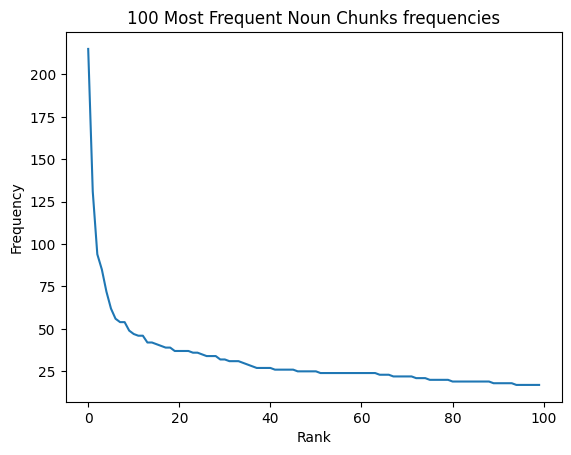

In [42]:
#1-i
import matplotlib.pyplot as plt

noun_chunks_count_sorted = sorted(noun_chunks_count.items(), key=lambda x: x[1], reverse=True)
rank = range(0, 100)
frequency = [x[1] for x in noun_chunks_count_sorted[:100]]

plt.plot(rank, frequency)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("100 Most Frequent Noun Chunks frequencies")
plt.show()

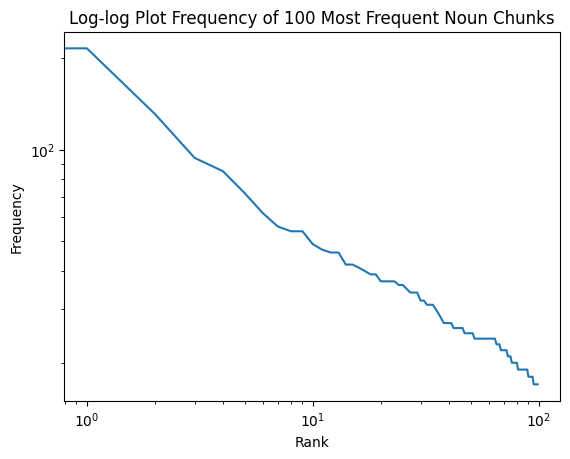

In [43]:
#1-j
noun_chunks_frequency = Counter(noun_chunks_count)

x = range(0, 100)
y = [noun_chunks_frequency.most_common(100)[i-1][1] for i in x]

plt.loglog(x, y)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Log-log Plot Frequency of 100 Most Frequent Noun Chunks")
plt.show()
